<a href="https://colab.research.google.com/github/abidshafee/predictionModel/blob/master/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/abidshafee/predictionModel/master/diabetes.csv')

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [43]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
# df = df.dropna(axis=1)

In [45]:
df.shape

(768, 9)

In [46]:
X = df.iloc[:,:-1]

In [47]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [48]:
y = df.iloc[:, -1]

In [49]:
type(y)

pandas.core.series.Series

In [50]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Cnverting target y to numpy array

In [51]:
y = y.values

In [52]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [53]:
type(y)

numpy.ndarray

### Scaling input data into STD range

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [56]:
sX = scaler.transform(X)

In [57]:
sX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(sX, y, test_size=0.20, random_state=11)

In [100]:
X_train.shape

(614, 8)

In [101]:
X_test.shape

(154, 8)

In [102]:
X_train

array([[ 2.71871250e+00, -4.66156309e-01,  4.62452528e-02, ...,
         2.80164319e-01, -6.67072645e-01,  1.59617091e+00],
       [-8.44885053e-01, -1.31117923e+00,  3.04734002e-01, ...,
         9.41978774e-04, -2.29155437e-01, -9.56461683e-01],
       [ 3.42980797e-01,  2.84975179e-01,  6.66618252e-01, ...,
         9.02068621e-01,  1.46211102e+00,  3.19854614e-01],
       ...,
       [ 4.60143347e-02,  6.58951615e-02,  5.63222752e-01, ...,
         9.41978774e-04, -8.72098593e-02,  6.45913543e-02],
       [-2.50952128e-01, -2.47076292e-01, -1.29789624e+00, ...,
        -1.21748278e+00, -1.00230582e+00, -9.56461683e-01],
       [-5.47918591e-01,  2.53678033e-01, -3.57259724e+00, ...,
         8.25917074e-01, -5.07006355e-01,  6.60205626e-01]])

### Creating Machine Learning Model and Training Model to Predict the Outcome

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
knn = KNeighborsClassifier(n_neighbors=16)

In [136]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [106]:
prediction = knn.predict(X_test)

In [107]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Measuring Model Accurecy

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
knn_accuracy = round((accuracy_score(y_test, prediction) * 100), 2)

In [110]:
print(str(knn_accuracy) + '%')

75.32%


###Selecting best K value or n_neighbors

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
accuracy =[]
for num in range(5, 25):
  knn = KNeighborsClassifier(n_neighbors=num)
  acc= cross_val_score(knn, X, y, cv=20)
  accuracy.append(acc.mean()*100) #1-acc.mean()

In [113]:
for ix, val in enumerate(accuracy, start=5):
  print(ix, val)

5 72.29419703103913
6 73.46828609986505
7 74.12280701754386
8 73.85964912280701
9 73.85964912280703
10 74.11605937921728
11 73.85964912280703
12 75.02699055330633
13 75.29689608636978
14 75.67476383265857
15 75.03036437246963
16 76.6025641025641
17 75.82658569500674
18 76.72739541160594
19 75.45883940620783
20 75.82995951417003
21 74.93252361673413
22 75.83333333333333
23 74.80431848852899
24 74.91902834008096


### Testing Accurecy of KNN Model using "confusion_matrix", and "classification_report":

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

[[91  9]
 [29 25]]


In [117]:
print(conf_matrix.shape)

(2, 2)


#### Ploting Confusion Matrix
Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

In [120]:
from matplotlib import pyplot as plt
import seaborn as sns

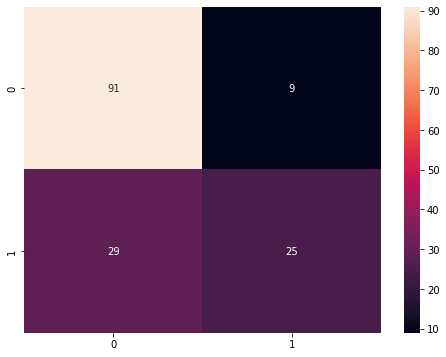

In [121]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True)

In [122]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.74      0.46      0.57        54

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154



In [126]:
# y.unique()
# y.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


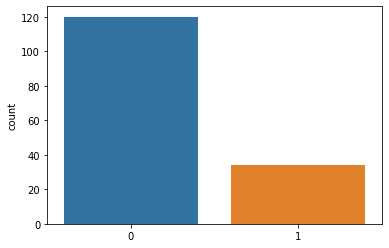

In [128]:
sns.countplot(prediction)
sns.set(style="darkgrid")

### Predicting over individual input

In [144]:
input1 = X.iloc[[7]]
input1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
7,10,115,0,0,0,35.3,0.134,29


In [145]:
x1 = scaler.fit_transform(input1)

In [148]:
out1 = knn.predict(x1)
print(out1)

[0]


### Manually Checking Our Model Accurecy

In [152]:
df.loc[(df['DiabetesPedigreeFunction']==0.134) & (df['BMI']==35.3)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
